## **K Means Clustering for Customer Data¶** 

### About the dataset

This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is assign to the customer based on their defined parameters like customer behavior and purchasing data i.e how well the customer buys products. Thus, the aim is to know what, who and how customers purchase goods by knowing what actually determines their purchase such as age, annual income and gender. The spending score is between 1-100 which mean customer between 70-100 spending score a vital and potential customers so lets know what determine such customers.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib      
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
pd.set_option('display.max_columns', 100)
from pandas.plotting import parallel_coordinates
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
from matplotlib import patheffects
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving segmented_customers.csv to segmented_customers.csv


In [ ]:
df=pd.read_csv('segmented_customers.csv')
df=df.drop(columns=['cluster'], axis=1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## DATA ANALYSIS: Descriptive and Inferential Statistics

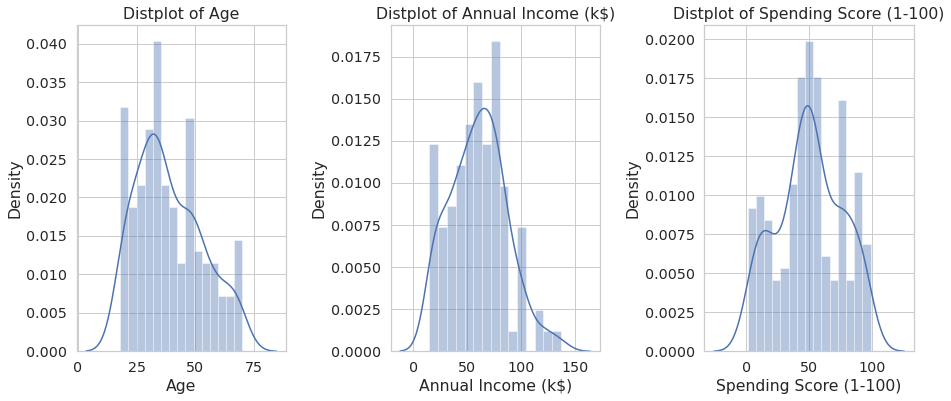

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

This means the data are normally distributed i.e the mean, meadian and mode are to the centre. The displot of Age shows that the customers whose age are between 25-50 purchases product more, the displot of annual income shows that the customers whose annual income are between  50− 90K purchases product more. last, The spending-score distplot shows that customers who have good spending score (customer behavior and purchasing data i.e how well the customer buys products) i.e 70-100 are below average check below the mean of spending score is 50.

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


next let have an idea of knowing which gender purchase products.

<Figure size 1080x432 with 0 Axes>

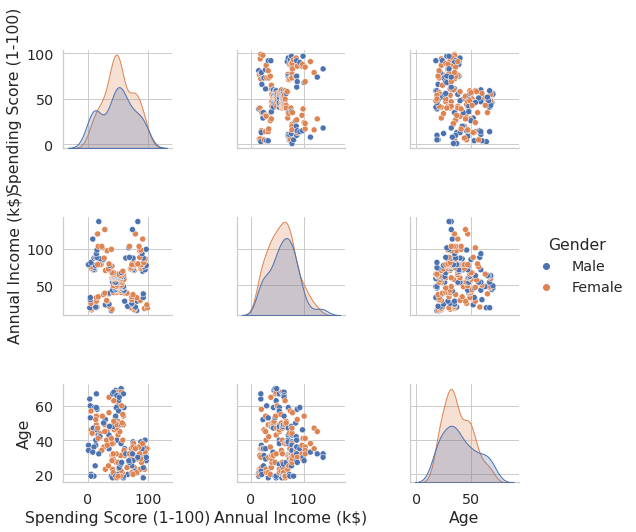

In [ ]:
plt.figure(1 , figsize = (15 , 6))
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

This shows there is more of female than male that purchase product.

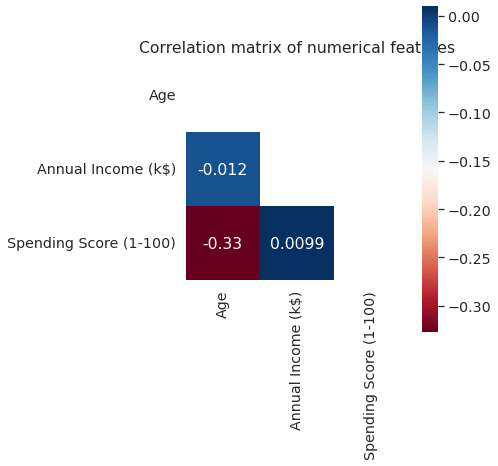

In [ ]:
df_corr=df[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]
corr=df_corr.corr()
plt.subplots(figsize=(7,7));
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap="RdBu", square=True, mask=mask)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

### **USING KMean cluster to predict customer that has good spending score i.e potential customers based on their age and annual income.**

In [ ]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

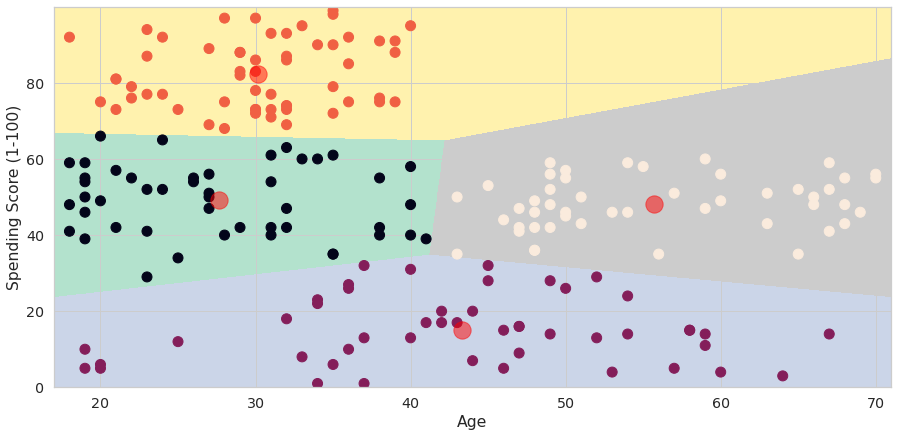

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

Above shows the segmentation of customer's spending score based on age. it's obviously seen that customers that has 70-100 to spending score are customers whose age are between 20-40 years which means the company should target more customers whose age are between 20-40. So it might be that the product is more useful to people within this age bracket. Thus this helps the company gain useful insight on their target customers.

In [ ]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

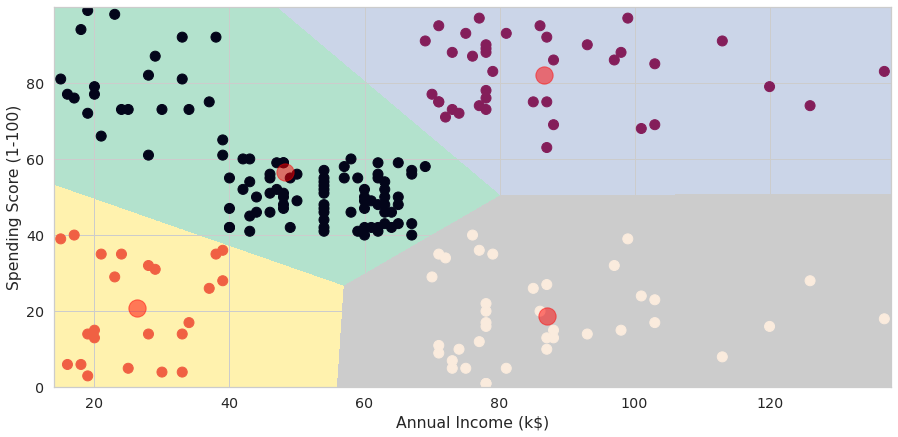

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

based on the relationship between annual income and spending score, the insight to be gain might be tight. but based on the above graph it's shows that the product been sold is not an ostentatious goods i.e both low and higher income earners can purchase the product. Infact those with higher income between 100 and 120 dollar respectively don't actual purchase the product. This means the target customers will be low and medium annual income earners. 

Final Note
Thus, we have analysed Customer data and performed 2D and 3D clustering using K Means Algorithm. This kind of cluster analysis helps design better customer acquisition strategies and helps in business growth. :)
Thanks.